# Summaries



In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# Import dataframe
df_main = pd.read_csv('Resources/nyc_bakeries_aggregated.csv', index_col='Unnamed: 0')

# Convert phone and display phone to bools
df_main['phone'] = df_main['phone'].apply(lambda x: False if pd.isna(x) else True)
df_main['display_phone'] = df_main['display_phone'].apply(lambda x: False if pd.isna(x) else True)

# Convert price into numerical values
df_main['price'] = df_main['price'].replace({'$': 1., 
                                             '$$': 2.,
                                             '$$$': 3.,
                                             '$$$$' : 4.,
                                             '$$$$$' : 5.})
df_main.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/nyc_bakeries_aggregated.csv'

In [ ]:
# Distribution of business category
category_agg = df_main.groupby('category').agg({'name': 'count', 'rating': 'mean', 'review_count': 'mean'}).sort_values(by='name', ascending=False).reset_index()

# Set standard color palette
ten_colors = sns.color_palette()

# Import squarify module for tree plot
import squarify
    # Select top ten categories
to_squarify = category_agg.iloc[:10,:]

# Calculate frequency
to_squarify_sum = sum(to_squarify.name)
to_squarify['freq'] = to_squarify.name.apply(lambda x: x/to_squarify_sum)

# Create plot
fig7, ax7 = plt.subplots(figsize=(8,8))
squarify.plot(sizes=to_squarify.name, label=to_squarify.category, alpha=0.8, color=ten_colors, ax=ax7)

# Plot attributes
plt.title('Most popular Yelp Categories for Desserts')
ax7.set_xticks((0,0))
ax7.set_yticks((0,0))
plt.show()

# Export
fig7.savefig('Images/category-dist.png', format='png', dpi=150)

to_squarify

In [4]:
# # Add Zipcodes 
# # https://gis.stackexchange.com/questions/352961/converting-lat-lon-to-postal-code-using-python
# import geopy
# import pandas as pd
# from time import sleep
# 
# # Modified because Geopy's ToS limits 1 req per second.
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     df['zip'] = None
#     for index, row in df.iterrows():
#         row_coords = row[lat_field], row[lon_field]
#         location = geolocator.reverse(row_coords, exactly_one=True)
#         sleep(2)
#         if location and location.raw.get('address', {}).get('postcode'):
#             df.at[index, 'zip'] = location.raw['address']['postcode']
#     return df
# 
# geolocator = geopy.Nominatim(user_agent='my-geoapiExercises')
# 
# zipcodes = get_zipcode(df_main, geolocator=geolocator, lat_field='coord_lat', lon_field='coord_long')
# 
# zipcodes

In [5]:
# Preview to_squarify aggregated subframe
to_squarify

,category,name,rating,review_count,freq
0,bakeries,1145,4.168122,199.882969,0.272489
1,coffee,861,4.170151,219.097561,0.204902
2,desserts,656,4.244665,268.032012,0.156116
3,breakfast&brunch,295,4.100000,482.077966,0.070205
4,cafes,264,4.179924,199.784091,0.062827
5,cakeshop,247,4.311741,156.453441,0.058782
6,icecream,229,4.237991,263.895197,0.054498
7,sandwiches,203,4.115764,333.507389,0.048310
8,donuts,172,4.177326,151.447674,0.040933
9,cupcakes,130,4.373077,213.492308,0.030938


In [6]:
# Isolate categories for statistical tests
bakeries_sub = df_main[df_main['category'] == 'bakeries']
coffee_sub = df_main[df_main['category'] == 'coffee']
desserts_sub = df_main[df_main['category'] == 'desserts']
bnb_sub = df_main[df_main['category'] == 'breakfast&brunch']
cafes_sub = df_main[df_main['category'] == 'cafes']
cakeshop_sub = df_main[df_main['category'] == 'cakeshop']
icecream_sub = df_main[df_main['category'] == 'icecream']
sandwiches_sub = df_main[df_main['category'] == 'sandwiches']
donuts_sub = df_main[df_main['category'] == 'donuts']
cupcakes_sub = df_main[df_main['category'] == 'cupcakes']

df_sub_categories = pd.concat([bakeries_sub, coffee_sub, desserts_sub, bnb_sub, cafes_sub, cakeshop_sub, icecream_sub, sandwiches_sub, donuts_sub, cupcakes_sub])

# Get only relevant columns for analysis
bakeries_sub = bakeries_sub[['rating', 'review_count']]
coffee_sub = coffee_sub[['rating', 'review_count']]
desserts_sub = desserts_sub[['rating', 'review_count']]
bnb_sub = bnb_sub[['rating', 'review_count']]
cafes_sub = cafes_sub[['rating', 'review_count']]
cakeshop_sub = cakeshop_sub[['rating', 'review_count']]
icecream_sub = icecream_sub[['rating', 'review_count']]
sandwiches_sub = sandwiches_sub[['rating', 'review_count']]
donuts_sub = donuts_sub[['rating', 'review_count']]
cupcakes_sub = cupcakes_sub[['rating', 'review_count']]

df_sub_categories

,id,name,review_count,category,rating,phone,display_phone,price,coord_lat,coord_long
0,epvSBt9LldIgyc08f8nIAw,La Bicyclette Bakery,3,bakeries,4.5,False,False,NaN,40.683587,-73.995090
2,-k_5NsYnKCHGTdBaqegkrw,Le Fournil,118,bakeries,4.5,False,False,2.0,40.727947,-73.988489
4,0kW0112jMERVjpRzWT4F7Q,La Bicyclette Bakery,84,bakeries,5.0,True,True,NaN,40.714400,-73.959110
6,XSwagBljEsxG2i1rq4GEAQ,Almondine Bakery,404,bakeries,4.0,True,True,2.0,40.703317,-73.991251
10,fPQ2eE9lm8tc87O5-GLjyA,Mille-Feuille Bakery,441,bakeries,4.5,True,True,2.0,40.782425,-73.981160
...,...,...,...,...,...,...,...,...,...,...
23036,_KZvpGHONExQhbGdCp7v7g,Sweets By Semi,2,cupcakes,5.0,True,True,NaN,40.697280,-73.836520
23138,3KUvNCqvSEpQoubplVgwjw,Bbang Lab,50,cupcakes,4.5,False,False,NaN,40.763653,-73.770205
23274,TSXUOq4aVlADZjC2aq5QSQ,Just-Delight-Full,34,cupcakes,4.0,True,True,3.0,40.655532,-73.838708
23350,Znk7-ZhbZ-QSM8ltqN5naw,Brent Bakes,3,cupcakes,5.0,True,True,NaN,40.592220,-73.989520


In [7]:
# Calculate significance using ANOVA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA
_, pval = f_oneway(bakeries_sub, coffee_sub, desserts_sub, bnb_sub, cafes_sub, cakeshop_sub, icecream_sub, sandwiches_sub, donuts_sub, cupcakes_sub)

# Perform Tukey's HSD
tukey_review_count = pairwise_tukeyhsd(df_sub_categories.review_count, df_sub_categories.category, 0.05)
tukey_rating = pairwise_tukeyhsd(df_sub_categories.rating, df_sub_categories.category, 0.05)

In [8]:
# Print results
print(tukey_review_count)
print(tukey_rating)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------
        bakeries breakfast&brunch   282.195    0.0  165.2343  399.1557   True
        bakeries            cafes   -0.0989    1.0  -122.398  122.2002  False
        bakeries         cakeshop  -43.4295 0.9854 -169.1022   82.2431  False
        bakeries           coffee   19.2146 0.9991  -61.5895  100.0187  False
        bakeries         cupcakes   13.6093    1.0 -152.1787  179.3973  False
        bakeries         desserts    68.149 0.2911  -19.5661  155.8642  False
        bakeries           donuts  -48.4353 0.9893 -194.9221   98.0515  False
        bakeries         icecream   64.0122 0.8661  -65.6595   193.684  False
        bakeries       sandwiches  133.6244 0.0606    -2.792  270.0408  False
breakfast&brunch            cafes -282.2939    0.0 -434.0567 -13

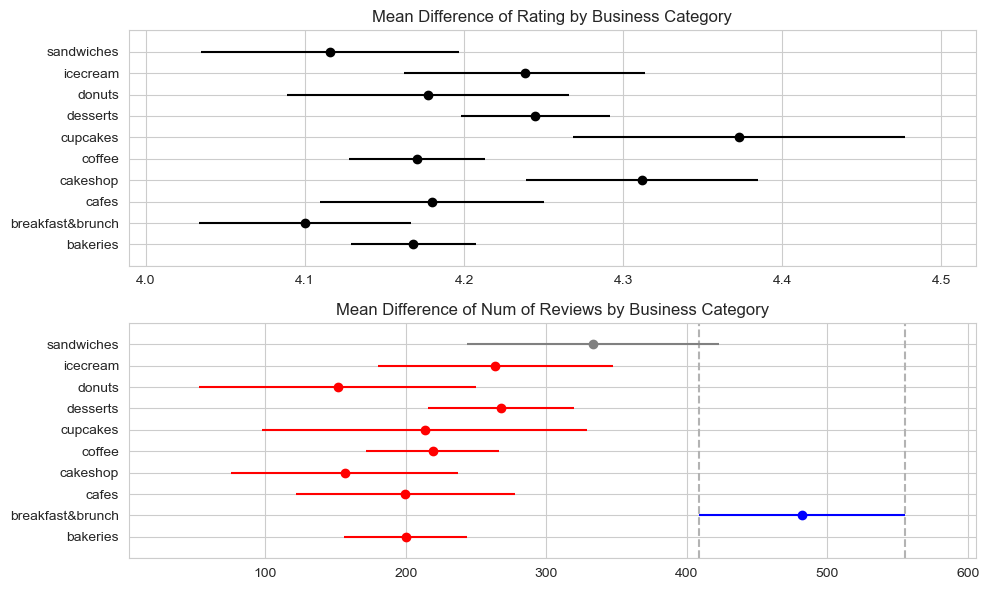

In [9]:
# Plot mean differences
fig8, ax8 = plt.subplots(2,1)
tukey_rating.plot_simultaneous(comparison_name=None, ax=ax8[0])
tukey_review_count.plot_simultaneous(comparison_name='breakfast&brunch', ax=ax8[1])

# Set Labels
ax8[0].set_title('Mean Difference of Rating by Business Category')
ax8[1].set_title('Mean Difference of Num of Reviews by Business Category')
fig8.tight_layout()

# Export 
fig8.savefig('Images/meandiffs.png', format='png', dpi=150)
fig8.show()


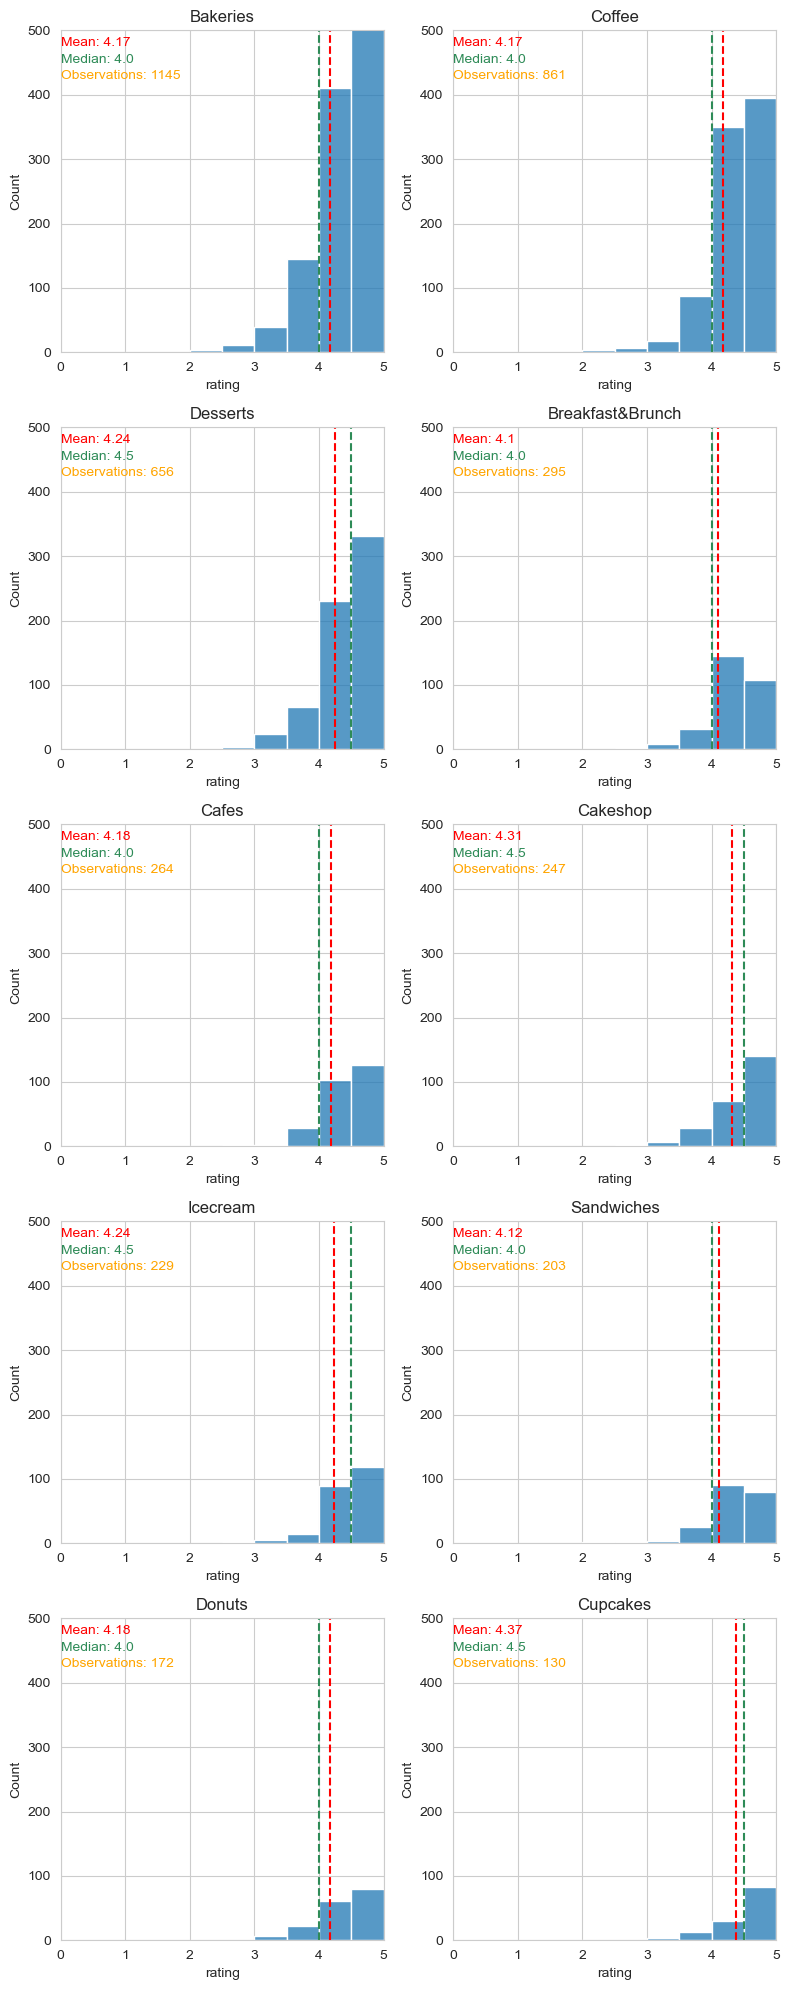

In [10]:
# Creating plot of buisness category rating
# Summaries
num_businesses = df_main.id.nunique()
total_reviews = df_main.review_count.sum()
df_main.category.value_counts()

# Plot business types
    # Generate Figure
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

    # Define categories of interest -- top 10 categories
categories = to_squarify.iloc[:10,:].category

    # Flatten subplots array and iterate through it along with the categories and titles
for axis, category, title in zip(ax.flatten(), categories, [cat.title() for cat in categories]):
    axis.set_title(title)
    sns.histplot(data=df_main[df_main['category'] == category].rating, ax=axis, binwidth=0.5, bins=10)
    # Create annotation line for mean and median values in dataset
    axis.axvline(df_main[df_main['category'] == category].rating.mean(), linestyle='dashed', color='red')
    axis.axvline(df_main[df_main['category'] == category].rating.median(), linestyle='dashed', color='seagreen')
    # Add text annotations
    axis.text(0, 475, f"Mean: {round(df_main[df_main['category'] == category]['rating'].mean(), 2)}", color='red')
    axis.text(0, 450, f"Median: {round(df_main[df_main['category'] == category]['rating'].median(), 2)}", color='seagreen')
    axis.text(0, 425, f"Observations: {len(round(df_main[df_main['category'] == category], 2))}", color='orange')

# Set chart limits
for r in range(5):
    for c in range(2): 
        ax[r, c].set_ylim(0, 500)
        ax[r, c].set_xlim(0, 5)

plt.tight_layout()
fig.savefig('Images/rating_vs_label.png', format='png', dpi=300)
plt.show()

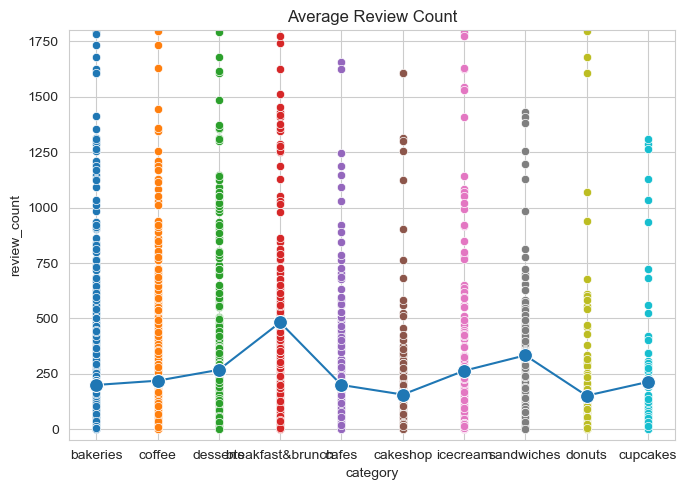

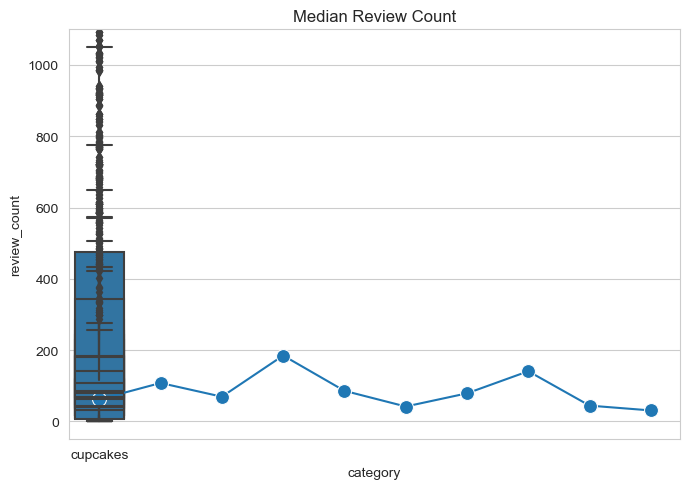

In [16]:
# Plot review counts
# Figure
fig1,ax1 = plt.subplots(1,1, figsize=(7,5))
fig1_1,ax1_1 = plt.subplots(1,1, figsize=(7,5))
review_count_means = []
review_count_medians = []

# Scatter plot Loop
for category in categories:
    # Generate scatterplot for each business vs review_count
    sns.scatterplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1)
    # Add title and set y limits
    ax1.set_title("Average Review Count")
    ax1.set_ylim(-50, 1800)
    # Create box plot as second plot
    sns.boxplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1_1)
    # Add title and limits
    ax1_1.set_title("Median Review Count")
    ax1_1.set_ylim(-50, 1800)
    # Rotate xtick labels on x-axis
    ax1_1.set_xticklabels(categories, rotation=45, ha='right')
    ax1.set_xticklabels(categories, rotation=45, ha='right')
    # Calculate mean and medians for respective category
    review_count_means.append(df_main[df_main['category'] == category].review_count.mean())
    review_count_medians.append(df_main[df_main['category'] == category].review_count.median())
    
# Overlay line plot on top of scatter and box charts to visualize median and mean
sns.lineplot(review_count_means, marker='o', markersize=10, ax=ax1)
sns.lineplot(review_count_medians, marker='o', markersize=10, ax=ax1_1)

# Tighten layout
fig1.tight_layout()
fig1_1.tight_layout()

# Export figures
fig1.savefig('Images/label_mean.png', format='png', dpi=300)
fig1_1.savefig('Images/label_med.png', format='png', dpi=300)

ax1_1.set_ylim(-50, 1100)
fig1_1.savefig('Images/label_med_zoomed.png', format='png', dpi=300)
plt.show()

In [ ]:
 # Phone number comparison, does having a phone number affect business traffic?
# Generate subplot
fig2,ax2 = plt.subplots(figsize=(4,4))
    # Add scatterplot of having phone vs not having phone
sns.scatterplot(data=df_main, x='display_phone', y='review_count', ax=ax2)
    # Define sample sets
has_phone_df = df_main[df_main['display_phone'] == True]
no_phone_df = df_main[df_main['display_phone'] == False]
    # Mean value of True False values
review_count_means_w_phone = [no_phone_df.review_count.mean(), has_phone_df.review_count.mean()]
sns.lineplot(review_count_means_w_phone, marker='o', markersize=10, linestyle='--', ax=ax2)
        # Add observations
ax2.text(0, 1800, f"Has Phone: {len(has_phone_df)}", color='orange')
ax2.text(0, 1700, f"No Phone: {len(no_phone_df)}", color='orange')
        # Add y-limit 
ax2.set_ylim(-100,2000)

# Get Slope
import statsmodels.api as sm
# Determine slope of review_count from display_phone
phone_model = sm.OLS.from_formula('review_count ~ display_phone', data=df_main)
# Capture params
phone_params = phone_model.fit().params

# Display annotations
ax2.text(0, 1500, f"Slope: {round(phone_params[1], 2)}", color='teal')
ax2.text(0, 1400, f"Intercept: {round(phone_params[0], 2)}", color='teal')
fig2.tight_layout()

# Export figure
fig2.savefig('Images/phone_num.png', format='png', dpi=300)

In [13]:
# Perform spatial cluster analysis
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

# Remove rows with missing latitude or longitude
df_main_dup_drop = df_main.drop_duplicates('id', inplace=False)
# Cluster by lat, long, and review_count
geo_data = df_main_dup_drop[['coord_lat', 'coord_long', 'review_count']].dropna()

# Standardize the latitude and longitude data
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data)

# DBscans
# Scaled eps and samples by business density and borough
dbscan_manhattan = DBSCAN(eps=0.025, min_samples=7)
clusters_manhattan = dbscan_manhattan.fit_predict(geo_data_scaled)
dbscan_qns = DBSCAN(eps=0.05, min_samples=4)
clusters_qns = dbscan_qns.fit_predict(geo_data_scaled)
dbscan_bk = DBSCAN(eps=0.030, min_samples=5)
clusters_bk = dbscan_bk.fit_predict(geo_data_scaled)

# Add cluster labels back to the cleaned dataframe
geo_data['cluster_man'] = clusters_manhattan
geo_data['cluster_qns'] = clusters_qns
geo_data['cluster_bk'] = clusters_bk
df_main_dup_drop['cluster_man'] = geo_data['cluster_man']
df_main_dup_drop['cluster_qns'] = geo_data['cluster_qns']
df_main_dup_drop['cluster_bk'] = geo_data['cluster_bk']

CRS of gdf: EPSG:2263
CRS of nyc_map: EPSG:2263


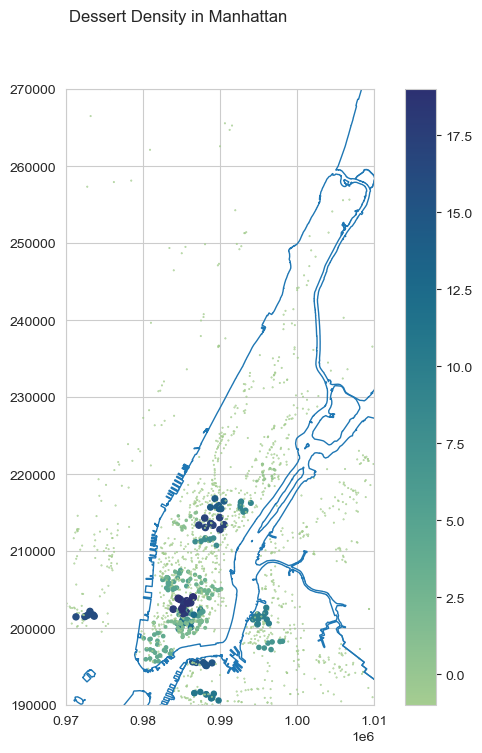

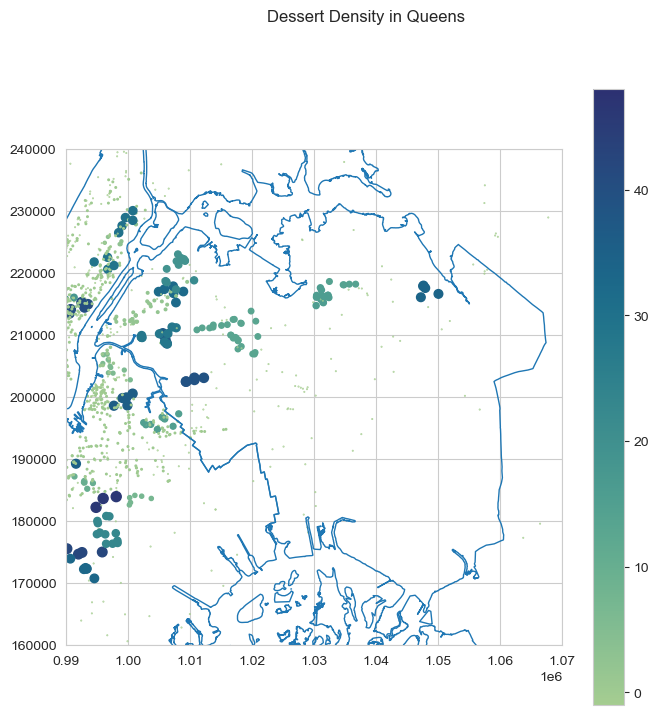

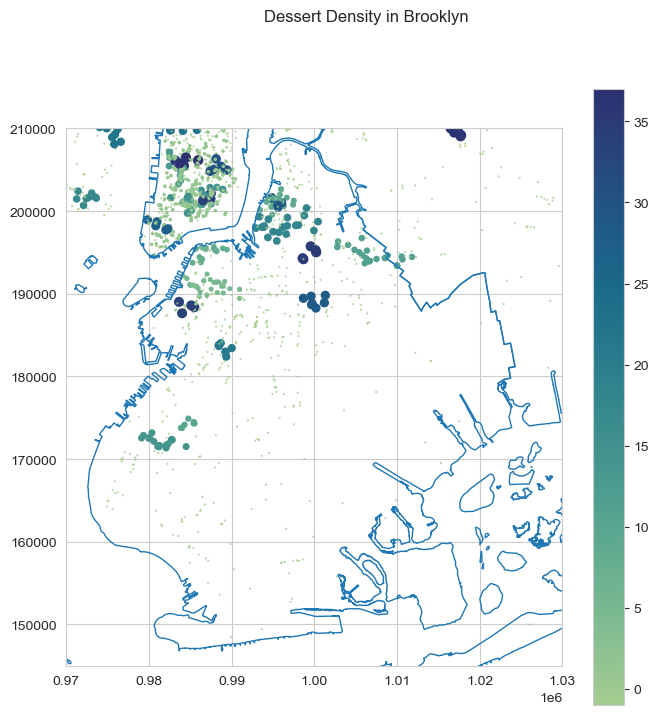

In [14]:
# Load nyc map
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))

# Create a GeoDataFrame with the clustered data
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.coord_long, geo_data.coord_lat))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(nyc_map.crs)

# Confirm reference system
print("CRS of gdf:", gdf.crs)
print("CRS of nyc_map:", nyc_map.crs)

# Plot clusters per borough
fig4, ax4 = plt.subplots(figsize=(8, 8))
nyc_map.boundary.plot(ax=ax4, linewidth=1)
gdf.plot(column='cluster_man', legend=True, ax=ax4, markersize=(clusters_manhattan * 1.1) + 1.3, cmap='crest')
ax4.set_xlim(0.97e6, 1.01e6)
ax4.set_ylim(190000, 270000)
fig4.suptitle("Dessert Density in Manhattan")
fig4.savefig('Images/manhattan_cluster.png', format='png', dpi=300)

fig5, ax5 = plt.subplots(figsize=(8, 8))
nyc_map.boundary.plot(ax=ax5, linewidth=1)
gdf.plot(column='cluster_qns', legend=True, ax=ax5, markersize=(clusters_qns * 1.1) + 1.3, cmap='crest')
ax5.set_xlim(0.99e6, 1.07e6)
ax5.set_ylim(160000, 240000)
fig5.suptitle("Dessert Density in Queens")
fig5.savefig('Images/queens_cluster.png', format='png', dpi=300)

fig6, ax6 = plt.subplots(figsize=(8, 8))
nyc_map.boundary.plot(ax=ax6, linewidth=1)
gdf.plot(column='cluster_bk', legend=True, ax=ax6, markersize=(clusters_bk * 1.1) + 1.3, cmap='crest')
ax6.set_xlim(0.97e6, 1.03e6)
ax6.set_ylim(145000, 210000)
fig6.suptitle("Dessert Density in Brooklyn")
fig6.savefig('Images/brooklyn_cluster.png', format='png', dpi=300)
plt.show()

In [15]:
geo_data

,coord_lat,coord_long,review_count,cluster_man,cluster_qns,cluster_bk
0,40.683587,-73.995090,3,-1,0,0
2,40.727947,-73.988489,118,-1,0,-1
4,40.714400,-73.959110,84,-1,0,-1
6,40.703317,-73.991251,404,-1,-1,-1
8,40.782425,-73.981160,441,-1,-1,-1
...,...,...,...,...,...,...
23404,40.735909,-74.066107,2,-1,-1,-1
23406,40.720389,-73.991616,85,12,0,1
23418,40.632040,-73.984840,5,-1,9,-1
23434,40.585861,-73.953604,20,-1,-1,-1
